In [9]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn


import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
hos = pd.DataFrame(housing.data)
hos.columns = housing.feature_names
hos['MedHouseVal'] = housing.target

In [3]:
hos.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [7]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('MedHouseVal ~ AveBedrms + HouseAge + HouseAge*AveBedrms + Population + MedInc',hos).fit()
m.summary()

/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorica

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MedHouseVal   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     4300.
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:04:31   Log-Likelihood:                -24874.
No. Observations:               20640   AIC:                         4.976e+04
Df Residuals:                   20634   BIC:                         4.981e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1742      0.044     -3.946      0.000      -0.261      -0.088
AveBedrms             -0.0067      0.033     -0.206      0.837      -0.070       0.057
HouseAge               0.0165      0.001     11.454      0.000       0.014       0.019
HouseAge:AveBedrms     0.0018      0.001      1.455      0.146      -0.001       0.004
Population          3.273e-05   5.23e-06      6.253      0.000    2.25e-05     4.3e-05
MedInc                 0.4330      0.003    144.789      0.000       0.427       0.439
==============================================================================
Omnibus:                     4149.602   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9918.846
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       5.540   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

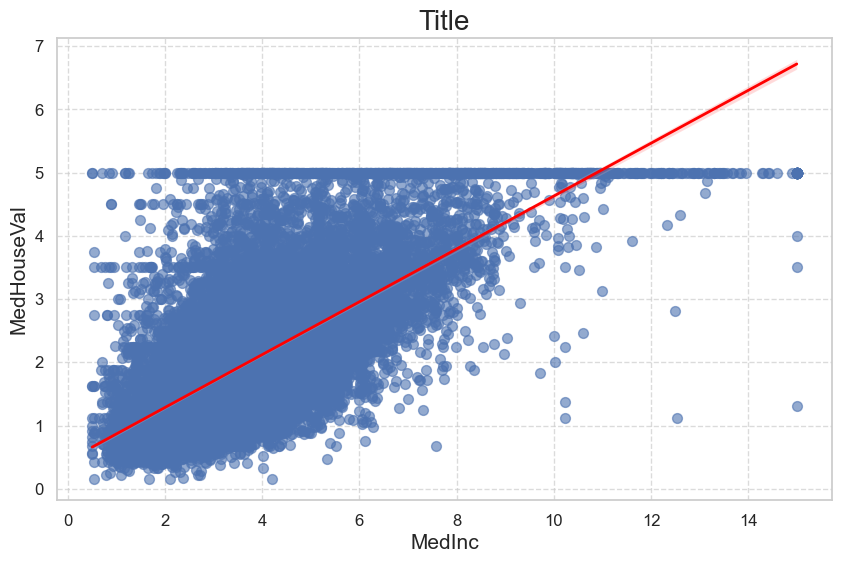

In [10]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(y="MedHouseVal", x="MedInc", data=hos, fit_reg=True, 
            scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'b'}, 
            line_kws={'color': 'red', 'linewidth': 2})

# Customize the plot with titles and labels
plt.title('Title', fontsize=20)
plt.xlabel('MedInc', fontsize=15)
plt.ylabel('MedHouseVal', fontsize=15)

# Customize the ticks on the axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()